In [1]:
#import the standard packages for data science
import pandas as pd
import xtarfile as tarfile
import missingno as msno
import folium

In [3]:
#tar = tarfile.open("SE_ground_stations_2018.tar.gz", "r:gz")
#tar.extractall()

In [2]:
SE = pd.read_csv('SE2018.csv', usecols=["number_sta", "lat", "lon", "height_sta", "date", "t"])

In [3]:
SE.head()

,number_sta,lat,lon,height_sta,date,t
0,1027003,45.83,5.11,196.0,20180101 00:00,280.65
1,1033002,46.09,5.81,350.0,20180101 00:00,279.35
2,1034004,45.77,5.69,330.0,20180101 00:00,280.45
3,1072001,46.20,5.29,260.0,20180101 00:00,280.25
4,1089001,45.98,5.33,252.0,20180101 00:00,280.65


In [4]:
stations = SE.groupby('number_sta').agg({'lat': 'mean', 'lon': 'mean', 'height_sta': 'mean'})
stations.shape

(545, 3)

<AxesSubplot: xlabel='lon', ylabel='lat'>

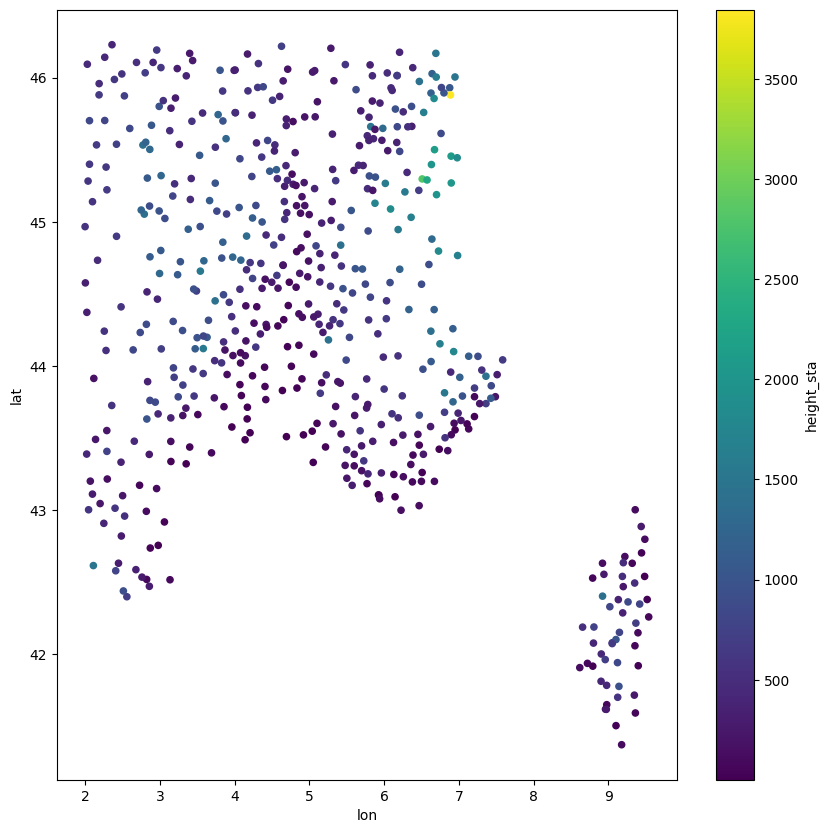

In [7]:
stations.plot.scatter(x='lon', y='lat', c='height_sta', cmap='viridis', figsize=(10, 10))

In [8]:
GreLat = 45.188
GreLon = 5.724


stations["dist"] = ((stations["lat"] - GreLat)**2 + (stations["lon"] - GreLon)**2)**0.5
D = stations["dist"].quantile(0.05)
Grenoble = stations[stations["dist"] < D]

In [9]:
m = folium.Map(location=[GreLat, GreLon], zoom_start=10)

# add a marker for each coordinate
for lat, lng in zip(Grenoble["lat"], Grenoble["lon"]):
    folium.Marker([lat, lng]).add_to(m)

# show the map
m

In [10]:
GreTemps = SE[SE["number_sta"].isin(Grenoble.index)]

In [5]:
Temps = SE.pivot_table(index="date", columns="number_sta", values="t")

In [6]:
Temps.shape

(87732, 533)

In [7]:
#save the data
Temps.to_csv("Temps.csv")
stations.to_csv("stations.csv")